In [5]:
import matplotlib.pyplot as plt
import seaborn as sbs

import random
import math
import numpy as np

import copy


import sys, os, time

from qinfer import LiuWestResampler
from qinfer import utils

from qiskit import IBMQ
from qiskit import QuantumCircuit, execute, Aer
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

import qiskit.ignis.verification.randomized_benchmarking as rb

#IBMQ.load_account()

from qinfer import FiniteOutcomeModel, DifferentiableModel
from qinfer.smc import SMCUpdater

sbs.set(style="darkgrid")

import matplotlib.lines as mlines
%matplotlib inline

## Simple Bootstrap Program ##

In [ ]:
def bootstrap(result, target=0, samples=900, repeats=1000):
    sampler = []
    for i in result:
        for _ in range(result[i]):
            sampler.append(int(i))
            
    probs = []
    
    for _ in range(repeats):
        tally = [0,0]
        for i in range(samples):
            sample = sampler[random.randint(0, len(sampler) - 1)]
            tally[target if target == sample else 1 - target] += 1
        
        probs.append(tally[target] / samples)
    return probs

In [2]:
circ.draw()
circ_2 = copy.deepcopy(circ)
print(circ_2.cregs)
cregs = circ_2.cregs
circ_2.remove_final_measurements(inplace=True) # Why does this remove registers by default?
circ_2.cregs = cregs
circ_2.x(0)
circ_2.measure([0],[0])
circ_2.draw()

NameError: name 'circ' is not defined

## Biased Measurement on the IBMQ Armonk ##

In [ ]:
provider = IBMQ.get_provider(group='open', project='main')
backend = provider.get_backend('ibmq_armonk')

n_qubits = 1
rb_circs, x_data= rb.randomized_benchmarking_seq(nseeds=5)

rb_circs = np.array(rb_circs).flatten()

for circ in rb_circs:
    circ_x = copy.deepcopy(circ)

    job = execute(circ, backend, shots=1000)
    result = job.result()
    print(result.get_counts(circ))

    cregs = circ_x.cregs
    circ_x.remove_final_measurements()
    circ_x.cregs = cregs
    circ_x.x(0)
    circ_x.measure([0],[0])

    job = execute(circ_x, backend, shots=1000)
    result = job.result()
    print(result.get_counts(circ_x))

In [76]:
circ.draw()

┌───┐┌───┐ ░ ┌───┐┌───┐┌───┐┌───┐ ░ ┌───┐┌─────┐┌───┐┌───┐ ░  ░ ┌───┐ ░ »
qr_0: ┤ H ├┤ X ├─░─┤ H ├┤ H ├┤ S ├┤ X ├─░─┤ H ├┤ SDG ├┤ H ├┤ Z ├─░──░─┤ X ├─░─»
      └───┘└───┘ ░ └───┘└───┘└───┘└───┘ ░ └───┘└─────┘└───┘└───┘ ░  ░ └───┘ ░ »
cr_0: ════════════════════════════════════════════════════════════════════════»
                                                                              »
«      ┌─────┐┌───┐ ░ ┌───┐ ░ ┌───┐┌─────┐┌───┐ ░ ┌─────┐┌───┐┌───┐ ░ ┌───┐ ░ »
«qr_0: ┤ SDG ├┤ H ├─░─┤ Z ├─░─┤ H ├┤ SDG ├┤ H ├─░─┤ SDG ├┤ H ├┤ Z ├─░─┤ X ├─░─»
«      └─────┘└───┘ ░ └───┘ ░ └───┘└─────┘└───┘ ░ └─────┘└───┘└───┘ ░ └───┘ ░ »
«cr_0: ═══════════════════════════════════════════════════════════════════════»
«                                                                             »
«      ┌───┐┌─────┐┌───┐┌───┐ ░ ┌───┐┌─────┐┌───┐┌───┐ ░ ┌───┐┌───┐ ░ ┌───┐»
«qr_0: ┤ H ├┤ SDG ├┤ H ├┤ Z ├─░─┤ H ├┤ SDG ├┤ H ├┤ Y ├─░─┤ H ├┤ Z ├─░─┤ H ├»
«      └───┘└─────┘└───┘└───┘ ░ └───┘└─────┘└───┘└───┘ ░ └───┘└───┘ ░ └───┘»
«cr_0: ════════════════════════════════════════════════════════════════════»
«                                                                          »
«      ┌─────┐┌───┐ ░ ┌───┐┌───┐┌───┐┌───┐ ░ ┌─────┐┌───┐ ░ ┌───┐┌─────┐┌───┐»
«qr_0: ┤ SDG ├┤ H ├─░─┤ H ├┤ H ├┤ S ├┤ X ├─░─┤ SDG ├┤ H ├─░─┤ H ├┤ SDG ├┤ H ├»
«      └─────┘└───┘ ░ └───┘└───┘└───┘└───┘ ░ └─────┘└───┘ ░ └───┘└─────┘└───┘»
«cr_0: ══════════════════════════════════════════════════════════════════════»
«                                                                            »
«      ┌───┐ ░ ┌───┐┌───┐┌───┐┌───┐ ░ ┌───┐┌───┐┌───┐ ░ ┌───┐┌───┐┌───┐ ░ »
«qr_0: ┤ X ├─░─┤ H ├┤ H ├┤ S ├┤ X ├─░─┤ H ├┤ S ├┤ Y ├─░─┤ H ├┤ S ├┤ X ├─░─»
«      └───┘ ░ └───┘└───┘└───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘ ░ »
«cr_0: ═══════════════════════════════════════════════════════════════════»
«                                                                         »
«      ┌─────┐┌───┐┌───┐┌─┐
«qr_0: ┤ SDG ├┤ H ├┤ H ├┤M├
«      └─────┘└───┘└───┘└╥┘
«cr_0: ══════════════════╩═
«

## Biased Measurement on the IBMQ Quito ##

In [ ]:
# Demonstrating bias
provider = IBMQ.get_provider(group='open', project='main')
#backend = provider.get_backend('ibmq_tokyo')
backend = provider.get_backend('ibmq_quito')
results = {}

n_qubits = 1
i = 0
while i <= 60:
    
    circuit = QuantumCircuit(n_qubits, n_qubits)
    for _ in range(i):
        circuit.x(0)
        circuit.barrier(0)
    circuit.measure(list(range(n_qubits)), list(range(n_qubits)))

    try:
        circuit_op_0 = transpile(circuit, backend=backend, optimization_level=0)
        job = execute(circuit_op_0, backend, shots=4000)
    except:
        continue
        
    result = job.result()
    results[i] = result.get_counts(circuit_op_0) 
    print(i, results[i])
    i += 1

## Saved Results From IBMQ Quinto ##
Results from a previous run on the IBMQ Quinto device

In [ ]:
results = {
    0 : {'0': 3950, '1': 50},
    1 : {'0': 315, '1': 3685},
    2 : {'0': 3957, '1': 43},
    3 : {'0': 342, '1': 3658},
    4 : {'0': 3948, '1': 52},
    5 : {'0': 332, '1': 3668},
    6 : {'0': 3948, '1': 52},
    7 : {'0': 355, '1': 3645},
    8 : {'0': 3942, '1': 58},
    9 : {'0': 401, '1': 3599},
    10 : {'0': 3944, '1': 56},
    11 : {'0': 343, '1': 3657},
    12 : {'0': 3928, '1': 72},
    13 : {'0': 439, '1': 3561},
    14 : {'0': 3940, '1': 60},
    15 : {'0': 384, '1': 3616},
    16 : {'0': 3916, '1': 84},
    17 : {'0': 386, '1': 3614},
    18 : {'0': 3911, '1': 89},
    19 : {'0': 421, '1': 3579},
    20 : {'0': 3898, '1': 102},
    21 : {'0': 411, '1': 3589},
    22 : {'0': 3889, '1': 111},
    23 : {'0': 413, '1': 3587},
    24 : {'0': 3875, '1': 125},
    25 : {'0': 467, '1': 3533},
    26 : {'0': 3847, '1': 153},
    27 : {'0': 458, '1': 3542},
    28 : {'0': 3844, '1': 156},
    29 : {'0': 487, '1': 3513},
    30 : {'0': 3866, '1': 134},
    31 : {'0': 473, '1': 3527},
    32 : {'0': 3843, '1': 157},
    33 : {'0': 508, '1': 3492},
    34 : {'0': 3838, '1': 162},
    35 : {'0': 550, '1': 3450},
    36 : {'0': 3797, '1': 203},
    37 : {'0': 523, '1': 3477},
    38 : {'0': 3735, '1': 265},
    39 : {'0': 653, '1': 3347},
    40 : {'0': 3707, '1': 293},
    41 : {'0': 591, '1': 3409},
    42 : {'0': 3717, '1': 283},
    43 : {'0': 608, '1': 3392},
    44 : {'0': 3731, '1': 269},
    45 : {'0': 572, '1': 3428},
    46 : {'0': 3751, '1': 249},
    47 : {'0': 567, '1': 3433},
    48 : {'0': 3765, '1': 235}
}

Boostrap results per point, boostrapping may not sample more points than the initial number of points

In [ ]:
n_repeats = 1000
x_coords = np.array([[i] * n_repeats for i in range(len(results))]).flatten()
y_coords = 1 - np.array([bootstrap(results[i], target = 0, samples=3600, repeats=n_repeats) for i in range(len(results))]).flatten()

Correct the expected state against flips

In [ ]:
y_coords = [min(i, 1 - i) for i in y_coords]

Plot results

/home/alan/aur/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


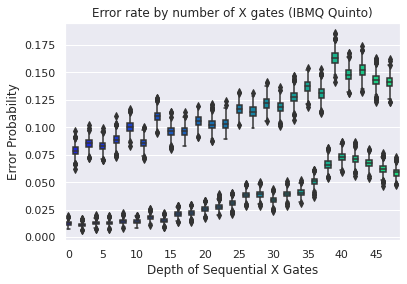

In [13]:
sbs.boxplot(x_coords, y_coords, palette="winter")
plt.xlabel("Depth of Sequential X Gates")
plt.ylabel("Error Probability")
plt.title("Error rate by number of X gates (IBMQ Quinto)")
plt.xticks(np.arange(0, 48, step=5), (0, 5, 10, 15, 20, 25, 30, 35, 40, 45))
plt.savefig('figs/error_rates_quinto.pdf')

In [ ]:
def bootstrap(result, target=0, samples=900, repeats=1000):
    sampler = []
    for i in result:
        for _ in range(result[i]):
            sampler.append(int(i))
            
    probs = []
    
    for _ in range(repeats):
        tally = [0,0]
        for i in range(samples):
            sample = sampler[random.randint(0, len(sampler) - 1)]
            tally[target if target == sample else 1 - target] += 1
        
        probs.append(tally[target] / samples)
    return probs

In [17]:
# 4000 shots IBMQ London
results = {
0: {'0': 3976, '1': 24},
1: {'0': 274, '1': 3726},
2: {'0': 3968, '1': 32},
3: {'0': 330, '1': 3670},
4: {'0': 3966, '1': 34},
5: {'0': 321, '1': 3679},
6: {'0': 3930, '1': 70},
7: {'0': 359, '1': 3641},
8: {'0': 3904, '1': 96},
9: {'0': 373, '1': 3627},
10: {'0': 3860, '1': 140},
11: {'0': 421, '1': 3579},
12: {'0': 3807, '1': 193},
13: {'0': 448, '1': 3552},
14: {'0': 3781, '1': 219},
15: {'0': 526, '1': 3474},
16: {'0': 3715, '1': 285},
17: {'0': 556, '1': 3444},
18: {'0': 3656, '1': 344},
19: {'0': 612, '1': 3388},
20: {'0': 3624, '1': 376}
}
n_repeats = 1000
x_coords = np.array([[i] * n_repeats for i in range(len(results))]).flatten()
y_coords = 1 - np.array([bootstrap(results[i], target = i % 2, samples=3600, repeats=n_repeats) for i in range(len(results))]).flatten()

Apply flips appropriately 

In [20]:
y_coords = [min(i, 1 - i) for i in y_coords]

Boostrapping, may not sample more than the initial number of points

In [18]:
n_repeats = 1000
x_coords = np.array([[i] * n_repeats for i in range(len(results))]).flatten()
y_coords = 1 - np.array([bootstrap(results[i], target = 0, samples=3600, repeats=n_repeats) for i in range(len(results))]).flatten()

Plot the output

/home/alan/aur/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


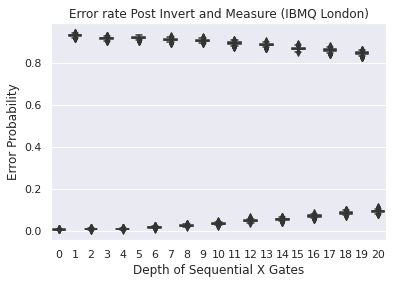

In [19]:
sbs.boxplot(x_coords, y_coords, palette="winter")
plt.xlabel("Depth of Sequential X Gates")
plt.ylabel("Error Probability")
plt.title("Error rate Post Invert and Measure (IBMQ London)")
plt.savefig('figs/error_rates_london.pdf')

In [30]:
# 4000 shots IBMQ Armock
results = {
0: {'1': 270, '0': 3730},
1: {'1': 3683, '0': 317},
2: {'1': 251, '0': 3749},
3: {'1': 3701, '0': 299},
4: {'1': 231, '0': 3769},
5: {'1': 3711, '0': 289},
6: {'1': 241, '0': 3759},
7: {'1': 3614, '0': 386},
8: {'1': 397, '0': 3603},
9: {'1': 3705, '0': 295},
10: {'1': 233, '0': 3767},
11: {'1': 3616, '0': 384},
12: {'1': 263, '0': 3737},
13: {'1': 3660, '0': 340},
14: {'1': 244, '0': 3756},
15: {'1': 3704, '0': 296},
16: {'1': 283, '0': 3717},
17: {'1': 3684, '0': 316},
18: {'1': 339, '0': 3661},
19: {'1': 3622, '0': 378},
20: {'1': 454, '0': 3546}
}
n_repeats = 1000
x_coords = np.array([[i] * n_repeats for i in range(len(results))]).flatten()
y_coords = 1 - np.array([bootstrap(results[i], target = i % 2, samples=4000, repeats=n_repeats) for i in range(len(results))]).flatten()

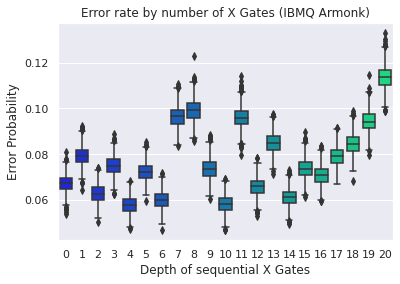

In [31]:
sbs.boxplot(x_coords, y_coords, palette="winter")
plt.xlabel("Depth of sequential X Gates")
plt.ylabel("Error Probability")
plt.title("Error rate by number of X Gates (IBMQ Armonk)")
plt.savefig('figs/error_rates_armonk.pdf')

Saved Bayes Means from SMC over Armonk

In [ ]:
bayes_means_armonk = np.array(
[[0.11922527, 0.21922329],
[0.12542873, 0.12341642],
[0.11641169, 0.2233302 ],
[0.12127065, 0.11467757],
[0.12223658, 0.2242921 ],
[0.12336171, 0.18966555],
[0.11542522, 0.22156043],
[0.12764724, 0.15248065],
[0.1256114,  0.22536679],
[0.12554046 ,0.19097198],
[0.11771773 ,0.21867409],
[0.12570477, 0.12339749],
[0.12050062, 0.22382141],
[0.12593544, 0.08752078],
[0.11602199, 0.22429151],
[0.12447612, 0.15229386],
[0.12581882, 0.22437927],
[0.12536589, 0.15256059],
[0.11649924, 0.22387844],
[0.12436851, 0.08679794],
])

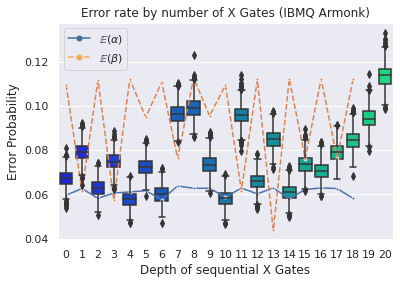

In [73]:
ax = sbs.lineplot(range(len(bayes_means_armonk) - 1), bayes_means_armonk[:-1, 0] / 2, marker='.')
ax.lines[0].set_marker('.')
ax.lines[0].set_linestyle('-')



sbs.lineplot(range(len(bayes_means_armonk)- 1), bayes_means_armonk[:-1, 1] / 2)
ax.lines[1].set_marker('.')
ax.lines[1].set_linestyle('--')

beta = mlines.Line2D([], [], color=sbs.xkcd_rgb["pale orange"], marker='.', linestyle='--',
                          markersize=10, label=r'$\mathbb{E}(\beta)$')
alpha = mlines.Line2D([], [], marker='.', color=sbs.xkcd_rgb["muted blue"],
                          markersize=10, label=r'$\mathbb{E}(\alpha)$')

plt.legend(handles=[virgo, london])

sbs.boxplot(x_coords, y_coords, palette="winter")
plt.xlabel("Depth of sequential X Gates")
plt.ylabel("Error Probability")
plt.title("Error rate by number of X Gates (IBMQ Armonk)")

plt.legend(handles=[alpha, beta])

plt.savefig('figs/correction_armonk.pdf')